In [26]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
data = pd.read_csv(DATA_URL + "adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
print(data.shape)

(32561, 15)


In [28]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [30]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,3.26e+04,32561.00,32561.00,32561.00,32561.00
mean,38.58,1.90e+05,10.08,1077.65,87.30,40.44
std,13.64,1.06e+05,2.57,7385.29,402.96,12.35
min,17.00,1.23e+04,1.00,0.00,0.00,1.00
25%,28.00,1.18e+05,9.00,0.00,0.00,40.00
50%,37.00,1.78e+05,10.00,0.00,0.00,40.00
75%,48.00,2.37e+05,12.00,0.00,0.00,45.00
max,90.00,1.48e+06,16.00,99999.00,4356.00,99.00


In [31]:
data.describe(include=["object"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [32]:
data["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [33]:
data[data["sex"] == "Female"].mean()

age                   36.86
fnlwgt            185746.31
education-num         10.04
capital-gain         568.41
capital-loss          61.19
hours-per-week        36.41
dtype: float64

In [34]:
Germ = data["native-country"].value_counts()["Germany"]/data["native-country"].describe(include=["object"])[0]*100
Germ

0.42074874850281013

In [39]:
(data["salary"])

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: salary, Length: 32561, dtype: object

In [40]:
#the mean and standard deviation of age for those who earn more than 50K per year (salary feature)


data[(data["salary"] == ">50K")]["age"].mean()

44.24984058155847

In [43]:
data[(data["salary"] == ">50K")]["age"].std()

10.519027719851826

In [45]:
#mean and standard deviation of age for those who earn less than 50K per year
data[(data["salary"] == "<=50K")]["age"].mean()

36.78373786407767

In [46]:
data[(data["salary"] == "<=50K")]["age"].std()

14.02008849082488

In [65]:
data[data["salary"] == ">50K"]["education"].unique() 

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

In [66]:
data[(data["race"] == "Amer-Indian-Eskimo")]["age"].max()

82

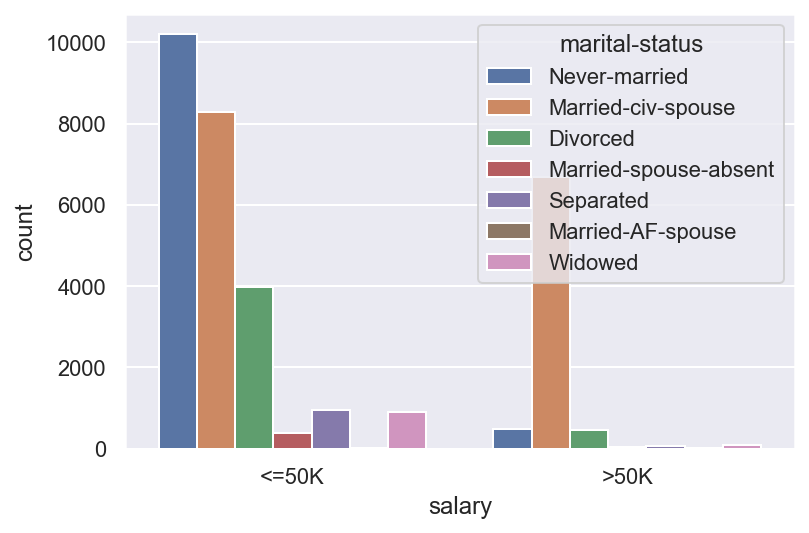

In [70]:
#the proportion of those who earn a lot (>50K) greater: married or single men  PLOT

# some imports to set up plotting
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns

# import some nice vis settings
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

sns.countplot(x="salary", hue="marital-status", data=data);

In [79]:
#the proportion of those who earn a lot (>50K) greater: married or single men Code

data[(data["salary"] == ">50K")& (data["marital-status"].str.startswith("Married"))].count()

age               6736
workclass         6736
fnlwgt            6736
education         6736
education-num     6736
marital-status    6736
occupation        6736
relationship      6736
race              6736
sex               6736
capital-gain      6736
capital-loss      6736
hours-per-week    6736
native-country    6736
salary            6736
dtype: int64

In [78]:
data[(data["salary"] == ">50K")& (data["marital-status"].str.startswith("Married") == False)].count()

age               1105
workclass         1105
fnlwgt            1105
education         1105
education-num     1105
marital-status    1105
occupation        1105
relationship      1105
race              1105
sex               1105
capital-gain      1105
capital-loss      1105
hours-per-week    1105
native-country    1105
salary            1105
dtype: int64

In [80]:
data[(data["salary"] == ">50K")& ~(data["marital-status"].str.startswith("Married"))].count()

age               1105
workclass         1105
fnlwgt            1105
education         1105
education-num     1105
marital-status    1105
occupation        1105
relationship      1105
race              1105
sex               1105
capital-gain      1105
capital-loss      1105
hours-per-week    1105
native-country    1105
salary            1105
dtype: int64

In [85]:
# married men
data[(data["sex"] == "Male")
     & (data["marital-status"].str.startswith("Married"))][
    "salary"
].value_counts(normalize=True)

<=50K    0.56
>50K     0.44
Name: salary, dtype: float64

In [86]:
# married men
data[(data["sex"] == "Male")
     & (data["marital-status"].str.startswith("Married")==False)][
    "salary"
].value_counts(normalize=True)

<=50K    0.92
>50K     0.08
Name: salary, dtype: float64

In [103]:
data["hours-per-week"].max()

99

In [99]:
data[(data["hours-per-week"] == 99)].count()

age               85
workclass         85
fnlwgt            85
education         85
education-num     85
marital-status    85
occupation        85
relationship      85
race              85
sex               85
capital-gain      85
capital-loss      85
hours-per-week    85
native-country    85
salary            85
dtype: int64

In [101]:
data[(data["hours-per-week"] == 99) & (data["salary"] == ">50K")].count()/data[(data["hours-per-week"] == 99)].count()*100

age               29.41
workclass         29.41
fnlwgt            29.41
education         29.41
education-num     29.41
marital-status    29.41
occupation        29.41
relationship      29.41
race              29.41
sex               29.41
capital-gain      29.41
capital-loss      29.41
hours-per-week    29.41
native-country    29.41
salary            29.41
dtype: float64

In [106]:
data[(data["salary"] == "<=50K") & (data["native-country"] == "Japan")]["hours-per-week"].mean()

41.0

In [107]:
data[(data["salary"] == ">50K") & (data["native-country"] == "Japan")]["hours-per-week"].mean()

47.958333333333336

In [110]:
pd.crosstab(
    data["native-country"],
    data["salary"],
    values=data["hours-per-week"],
    aggfunc=np.mean,
).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,40.16,41.42,37.91,37.38,38.68,37.99,42.34,38.04,36.03,40.48,41.06,39.14,41.81,39.36,36.33,40.0,34.33,39.14,31.3,38.23,41.44,40.95,39.62,38.24,41.00,40.38,40.00,36.09,41.86,35.07,38.07,38.17,41.94,38.47,39.44,40.16,33.77,42.87,37.06,38.80,37.19,41.6
>50K,45.55,40.00,45.64,38.90,50.00,42.44,47.00,48.75,45.00,44.53,50.75,44.98,50.62,36.67,42.75,NaN,60.00,45.00,50.0,46.48,47.50,48.00,45.40,41.10,47.96,40.00,46.58,37.50,NaN,40.00,43.03,39.00,41.50,39.42,46.67,51.44,46.80,58.33,40.00,45.51,39.20,49.5
